<a href="https://colab.research.google.com/github/yovictoraugusto/Regressao_Linear/blob/main/Regressao_Linear_VICTORAUGUSTOREISMARQUES_156620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA 1-2024/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
alldata = [data_train, data_test]

In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.corr()

<ipython-input-9-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
data_train.columns.values.shape

(12,)

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data_train['Embarked'].isna().sum()

2

In [ ]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
data_train['Embarked'].isna().sum()

0

In [ ]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [ ]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [ ]:
data_test.insert(loc=0, column='Survived', value=data_gender['Survived'].values)



In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.5,0,0,2
1,1,3,1,47.0,1,0,0
2,0,2,0,62.0,0,0,2
3,0,3,0,27.0,0,0,0
4,1,3,1,22.0,1,1,0


In [ ]:
data_test.shape

(418, 7)

In [ ]:
data_train['Age'].isna().sum()

177

In [ ]:
np.random.seed(0)

In [ ]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_train.at[line,'Age']=rand_age
      #print("Depois",line,data_train.iloc[line]["Age"])


In [ ]:
data_train["Age"].isnull().sum()

0

In [ ]:
data_test["Age"].isnull().sum()

86

In [ ]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_test.at[line,'Age']=rand_age
      #print("Depois",line,data_test.iloc[line]["Age"])

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [ ]:
X = data_train.drop(['Age'], axis=1).values
Y = data_train['Age'].values

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [ ]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [ ]:
#X_test = data_test.values
#Y_pred = clf.predict(X_test)

In [ ]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [ ]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 34,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [ ]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [ ]:
data_gender.shape

(418, 2)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_test['Survived'] = data_gender['Survived']

In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34,0,0,2
1,1,3,1,47,1,0,0
2,0,2,0,62,0,0,2
3,0,3,0,27,0,0,0
4,1,3,1,22,1,1,0


In [ ]:
data_test.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Pclass,-0.108615,1.000000,-0.108615,-0.430290,0.001087,0.018721,0.031096
Sex,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Age,-0.003778,-0.430290,-0.003778,1.000000,-0.067480,-0.050601,0.057969
SibSp,0.099943,0.001087,0.099943,-0.067480,1.000000,0.306895,-0.100603
Parch,0.159120,0.018721,0.159120,-0.050601,0.306895,1.000000,-0.125164
Embarked,0.126779,0.031096,0.126779,0.057969,-0.100603,-0.125164,1.000000


In [ ]:
# 1- juntar todos os dados em apenas uma planilha;
# 2- separar os dados em k-folds, onde k=5;
# 3- realizar tarefa de regressão de AGE utilizando modelos lineares;
# 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
# 6- Repetir mesmos passos 1--5 para o algoritmo de árvores de decisão;

In [ ]:
# 1- Juntar todos os dados em apenas uma planilha;
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [ ]:
nulos = np.where(full_data['Age'].values==0)
print(nulos)
full_data.values[nulos,3] = 1

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
       1245]),)


In [ ]:
np.where(full_data['Age'].values==0)

(array([], dtype=int64),)

In [ ]:
# 2- separar os dados em k-folds, onde k=5;
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [ ]:
# 3- realizar tarefa de regressão de AGE utilizando modelos lineares;
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

reg = linear_model.Lasso(alpha=0.1)

mse_values = []
mae_values = []
mape_values = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)

  Y_test = full_data.values[test_index][:,3]
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)

  reg.fit(X_train,Y_train)
  Y_pred = reg.predict(X_test)

  # 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
  mse = mean_squared_error(Y_test,Y_pred)
  mae = mean_absolute_error(Y_test,Y_pred)
  mape = mean_absolute_percentage_error(Y_test,Y_pred)

  mse_values.append(mse)
  mae_values.append(mae)
  mape_values.append(mape)

Fold 0:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    2    3 ... 1304 1306 1307]
  Test:  index=[   1    5    8    9   14   18   27   31   34   39   45   47   49   52
   55   58   61   75   80   85   92  108  124  140  141  142  152  156
  159  161  184  186  192  194  198  202  204  211  215  224  227  231
  233  240  241  247  251  254  268  270  276  283  295  298  299  302
  303  310  312  317  319  320  328  330  342  349  358  359  361  381
  386  390  393  397  406  408  412  416  418  420  422  425  426  427
  434  435  436  438  442  443  445  446  453  458  459  461  466  472
  474  477  478  482  483  486  491  503  505  506  511  512  513  523
  528  531  533  535  539  541  549  554  557  569  571  589  597  601
  608  609  610  618  625  632  638  641  642  649  651  656  658  669
  678  693  695  717  725  733  743  753  759  760  762  768  769  772
  773  785  790  792  793  794  795  796  798  813  814  817  833  839
  846  853  857  858  874  875  87

In [ ]:
# from sklearn import linear_model
# reg = linear_model.Lasso(alpha=0.1)
# reg.fit(X_train,Y_train)
# Y_pred = reg.predict(X_test)

In [ ]:
reg.coef_

array([-2.85399005, -6.08995044,  0.09190538, -1.6709641 , -0.5956727 ,
        0.10520567])

MSE: 151.799527
MAE: 9.714764
MAPE: 0.931417


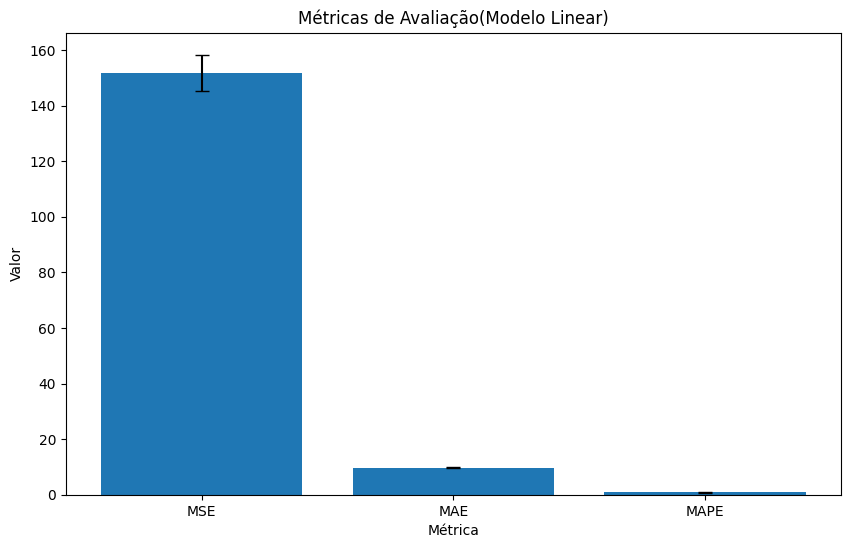

In [ ]:
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
import matplotlib.pyplot as plot

mse_mean = np.mean(mse_values)
mse_std = np.std(mse_values)

mae_mean = np.mean(mae_values)
mae_std = np.std(mae_values)

mape_mean = np.mean(mape_values)
mape_std = np.std(mape_values)

metrics = ['MSE', 'MAE', 'MAPE']
means = [mse_mean, mae_mean, mape_mean]
stds = [mse_std, mae_std, mape_std]

# print("MSE: %f" % mse_mean)
# print("MAE: %f" %mae_mean)
# print("MAPE: %f" %mape_mean)

plot.figure(figsize=(10, 6))
plot.bar(metrics, means, yerr=stds, capsize=5)
plot.title('Métricas de Avaliação(Modelo Linear)')
plot.xlabel('Métrica')
plot.ylabel('Valor')
plot.show()

In [ ]:
# 6- Repetir mesmos passos 1--5 para o algoritmo de árvores de decisão;

# 1- Juntar todos os dados em apenas uma planilha;
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [ ]:
nulos = np.where(full_data['Age'].values==0)
print(nulos)
full_data.values[nulos,3] = 1

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
       1245]),)


In [ ]:
np.where(full_data['Age'].values==0)

(array([], dtype=int64),)

In [ ]:
# 2- separar os dados em k-folds, onde k=5;
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [ ]:
# 3- realizar tarefa de regressão de AGE utilizando árvore de decisão;
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

clf = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_split=10,
                            criterion='squared_error')

mse_values_tree = []
mae_values_tree = []
mape_values_tree = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)

  Y_test = full_data.values[test_index][:,3]
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)

  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)

  # 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
  mse_tree = mean_squared_error(Y_test,Y_pred)
  mae_tree = mean_absolute_error(Y_test,Y_pred)
  mape_tree = mean_absolute_percentage_error(Y_test,Y_pred)

  mse_values_tree.append(mse_tree)
  mae_values_tree.append(mae_tree)
  mape_values_tree.append(mape_tree)

Fold 0:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    2    3 ... 1304 1306 1307]
  Test:  index=[   1    5    8    9   14   18   27   31   34   39   45   47   49   52
   55   58   61   75   80   85   92  108  124  140  141  142  152  156
  159  161  184  186  192  194  198  202  204  211  215  224  227  231
  233  240  241  247  251  254  268  270  276  283  295  298  299  302
  303  310  312  317  319  320  328  330  342  349  358  359  361  381
  386  390  393  397  406  408  412  416  418  420  422  425  426  427
  434  435  436  438  442  443  445  446  453  458  459  461  466  472
  474  477  478  482  483  486  491  503  505  506  511  512  513  523
  528  531  533  535  539  541  549  554  557  569  571  589  597  601
  608  609  610  618  625  632  638  641  642  649  651  656  658  669
  678  693  695  717  725  733  743  753  759  760  762  768  769  772
  773  785  790  792  793  794  795  796  798  813  814  817  833  839
  846  853  857  858  874  875  87

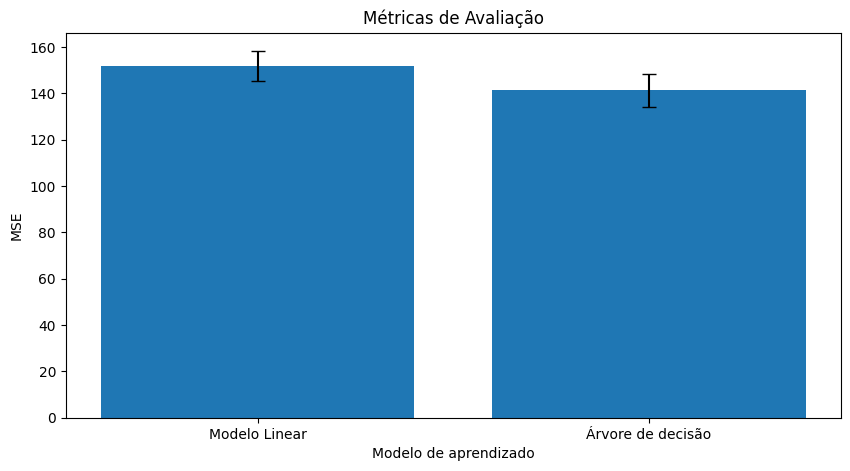

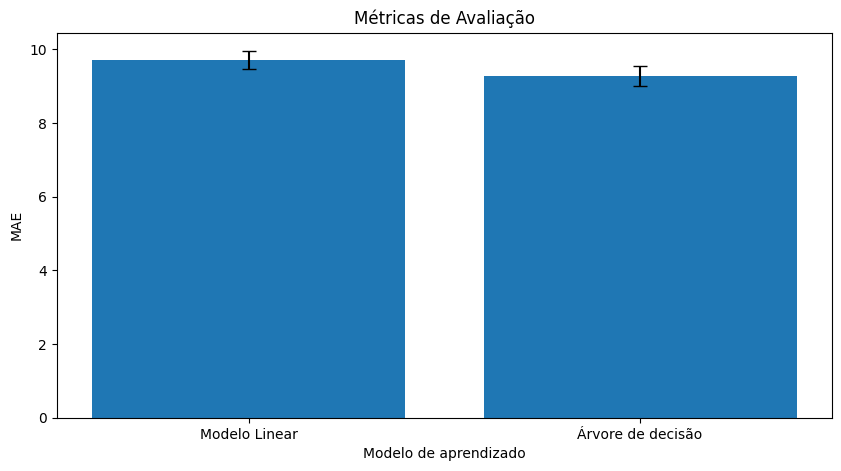

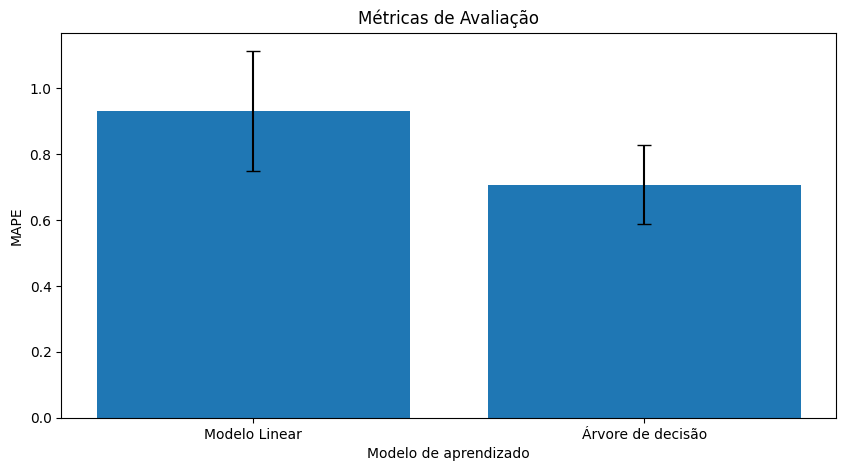

MSE: 151.799527
MAPE: 0.931417
MAE: 9.714764
MSE TREE: 141.411520
MAPE TREE: 0.707333
MAE TREE: 9.277026


In [ ]:
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
import matplotlib.pyplot as plot

mse_mean = np.mean(mse_values)
mse_std = np.std(mse_values)
mse_mean_tree = np.mean(mse_values_tree)
mse_std_tree = np.std(mse_values_tree)

mae_mean = np.mean(mae_values)
mae_std = np.std(mae_values)
mae_mean_tree = np.mean(mae_values_tree)
mae_std_tree = np.std(mae_values_tree)

mape_mean = np.mean(mape_values)
mape_std = np.std(mape_values)
mape_mean_tree = np.mean(mape_values_tree)
mape_std_tree = np.std(mape_values_tree)

metrics_mse = ['Modelo Linear', 'Árvore de decisão']
means_mse = [mse_mean, mse_mean_tree]
stds_mse = [mse_std, mse_std_tree]

plot.figure(figsize=(10, 5))
plot.bar(metrics_mse, means_mse, yerr=stds_mse, capsize=5)
plot.title('Métricas de Avaliação')
plot.xlabel('Modelo de aprendizado')
plot.ylabel('MSE')
plot.show()

metrics_mae = ['Modelo Linear', 'Árvore de decisão']
means_mae = [mae_mean, mae_mean_tree]
stds_mae = [mae_std, mae_std_tree]

plot.figure(figsize=(10, 5))
plot.bar(metrics_mae, means_mae, yerr=stds_mae, capsize=5)
plot.title('Métricas de Avaliação')
plot.xlabel('Modelo de aprendizado')
plot.ylabel('MAE')
plot.show()

metrics_mape = ['Modelo Linear', 'Árvore de decisão']
means_mape = [mape_mean, mape_mean_tree]
stds_mape = [mape_std, mape_std_tree]

plot.figure(figsize=(10, 5))
plot.bar(metrics_mape, means_mape, yerr=stds_mape, capsize=5)
plot.title('Métricas de Avaliação')
plot.xlabel('Modelo de aprendizado')
plot.ylabel('MAPE')
plot.show()

print("MSE: %f" % mse_mean)
print("MAPE: %f" %mape_mean)
print("MAE: %f" %mae_mean)

print("MSE TREE: %f" % mse_mean_tree)
print("MAPE TREE: %f" %mape_mean_tree)
print("MAE TREE: %f" %mae_mean_tree)